# 1. Business Understanding

# 2. Data Understanding

This data was collected from the  between October 2015 and November 2023. The data
will be extracted from the [opendataAfrica website]('https://open.africa/dataset/3e95b5cb-39f5-44d3-94b6-f2d5285b0478/resource/0257f153-7228-49ef-b330-8e8ed3c7c7e8/download/ehealth-kenya-facilities-download-21102015.xls'), an API is provided to extract the data for an analysis. The data includes a comprehensive list of health facilities in Kenya, complete with services offered as well as granular geo-data (Provincial, County, District, Location, Sub-Location and Division information) 

This phase is broken down into four tasks that include;
* Collection of the Initial Data
* Data Description
* Data Cleaning
* Exploratory Data Analysis

### 2.1 Data Overview
#### 2.1.1 Loading the dataset

In [2]:
#import the necessary libraries

## Libraries for loading the dataset
import requests
import json

## FOr data analysis and preparation
import pandas as pd
import numpy as np

## For data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings

In [3]:

# Define the URL to access the data
url = 'https://open.africa/dataset/3e95b5cb-39f5-44d3-94b6-f2d5285b0478/resource/0257f153-7228-49ef-b330-8e8ed3c7c7e8/download/ehealth-kenya-facilities-download-21102015.xls'

# Send a GET request to the URL and retrieve the response
response = requests.get(url)

#Ignore any warning that may occur
#warnings.filterwarnings('ignore', message=".*SSCS size is 0 but SSAT size is non-zero.*")

# Save the content to a file
with open('ehealth_data.xls', 'wb') as f:
    f.write(response.content)

# Read the Excel file into a DataFrame
facilities_df = pd.read_excel('ehealth_data.xls')

# Print the DataFrame
print(facilities_df)


WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
       Facility Code                                Facility Name  \
0              19224                       CDF Kiriari Dispensary   
1              19310   St Jude's Huruma Community Health Services   
2              14180                              10 Engineer VCT   
3              17486                                 12 Engineers   
4              18393                 3Kl Maternity & Nursing Home   
...              ...                                          ...   
10500          17220                                     Ziwa SDA   
10501          15788                   Ziwa Sub-District Hospital   
10502          11915                            Ziwani Dispensary   
10503          16997                    Zombe Catholic Dispensary   
10504          20313                         Zombe medical clinic   

          Province        County       District            Division  \
0          Eastern         

We can see there is some regions included that are not in Nairobi, let's categorize them and analyses only the heathcare facilities in Nairobi


In [4]:
# Filtering the data to Nairob Province only 
Nairobi = facilities_df['Province'] == 'Nairobi'
Nairobi_df = facilities_df[Nairobi]
print(Nairobi_df)


       Facility Code                                Facility Name Province  \
1              19310   St Jude's Huruma Community Health Services  Nairobi   
7              13043                        7Kr Mrs Health Centre  Nairobi   
10             20346                      AAR Adams Health Centre  Nairobi   
11             12861                       AAR City Centre Clinic  Nairobi   
12             16796          AAR Clinic Sarit Centre (Westlands)  Nairobi   
...              ...                                          ...      ...   
10459          13260                      Woodstreet Nursing Home  Nairobi   
10493          19273                   Zimerbreeze Medical Centre  Nairobi   
10494          19378                            Zimma Health Care  Nairobi   
10495          13261                 Zimmerman Medical Dispensary  Nairobi   
10496          13262                               Zinduka Clinic  Nairobi   

        County   District         Division                     

We have an additional dataset on population by age, sex and county

In [5]:
import pandas as pd

# URL of the dataset
url = "https://open.africa/dataset/9b94fe50-9d75-4b92-be00-6354c6e6cc88/resource/b7edfdb4-2a07-4332-8796-2f00968aff0e/download/distribution-of-population-by-age-sex-county-and-sub-county-kenya-2019-census-volume-iii.csv"

# Read the CSV file into a pandas DataFrame
population_df = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(population_df)


           county  sub-county         Age    Male  Female   Total
0         BARINGO         ALL       Total  336322  330428  666750
1         BARINGO         ALL           0    8303    7982   16285
2         BARINGO         ALL           1    8669    8417   17086
3         BARINGO         ALL           2   10226    9762   19988
4         BARINGO         ALL           3   10265   10086   20351
...           ...         ...         ...     ...     ...     ...
48203  WEST POKOT  WEST POKOT          98       6       5      11
48204  WEST POKOT  WEST POKOT          99       3      17      20
48205  WEST POKOT  WEST POKOT       95-99      18      52      70
48206  WEST POKOT  WEST POKOT        100+      15      39      54
48207  WEST POKOT  WEST POKOT  Not Stated       1       1       2

[48208 rows x 6 columns]


We only want the data on the population only based in Nairobi county. Lets then categorize this data set

In [6]:
Nairobipop = population_df['county'] == 'NAIROBI'
Nairobi_pop_df = population_df[Nairobipop]
print(Nairobi_pop_df.head(25))

        county sub-county     Age     Male   Female    Total
31604  NAIROBI        ALL   Total  2192452  2204376  4396828
31605  NAIROBI        ALL       0    57265    56523   113788
31606  NAIROBI        ALL       1    56019    54601   110620
31607  NAIROBI        ALL       2    52518    51848   104366
31608  NAIROBI        ALL       3    51115    51027   102142
31609  NAIROBI        ALL       4    47182    46889    94071
31610  NAIROBI        ALL   0 - 4   264099   260888   524987
31611  NAIROBI        ALL       5    45203    44711    89914
31612  NAIROBI        ALL       6    43635    44226    87861
31613  NAIROBI        ALL       7    43507    43655    87162
31614  NAIROBI        ALL       8    40916    41615    82531
31615  NAIROBI        ALL       9    41969    43275    85244
31616  NAIROBI        ALL     5-9   215230   217482   432712
31617  NAIROBI        ALL      10    40791    40892    81683
31618  NAIROBI        ALL      11    35581    37513    73094
31619  NAIROBI        AL

#### 2.1.2 Data Description

First let's look at the data on the *healthcare facilities* in Nairobi

In [7]:
## Checking the information about the dataframe
Nairobi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942 entries, 1 to 10496
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Facility Code            942 non-null    int64  
 1   Facility Name            942 non-null    object 
 2   Province                 942 non-null    object 
 3   County                   942 non-null    object 
 4   District                 942 non-null    object 
 5   Division                 914 non-null    object 
 6   Type                     942 non-null    object 
 7   Owner                    942 non-null    object 
 8   Location                 894 non-null    object 
 9   Sub Location             672 non-null    object 
 10  Description of Location  641 non-null    object 
 11  Constituency             942 non-null    object 
 12  Nearest Town             824 non-null    object 
 13  Beds                     942 non-null    float64
 14  Cots                    

In [8]:
#Checking the names of the columns and their types in the dataframe
Nairobi_df.columns
Nairobi_df.dtypes

Facility Code                int64
Facility Name               object
Province                    object
County                      object
District                    object
Division                    object
Type                        object
Owner                       object
Location                    object
Sub Location                object
Description of Location     object
Constituency                object
Nearest Town                object
Beds                       float64
Cots                       float64
Official Landline           object
Official Fax                object
Official Mobile             object
Official Email              object
Official Address            object
Official Alternate No      float64
Town                        object
Post Code                   object
In Charge                   object
Job Title of in Charge      object
Open 24 Hours               object
Open Weekends               object
Operational Status          object
ANC                 

In [9]:
#Let's have a look at the descriptive statistics of the numerical columns
Nairobi_df.describe()


,Facility Code,Beds,Cots,Official Alternate No,ANC,BEOC,BLOOD,CAES SEC,CEOC,EPI,...,HCT,OPD,OUTREACH,PMTCT,RAD/XRAY,RHTC/RHDC,TB DIAG,TB LABS,TB TREAT,YOUTH
count,942.000000,942.000000,942.000000,1.570000e+02,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,16799.744161,7.787686,1.152866,6.498035e+08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3129.912948,58.966655,15.196691,5.890122e+08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,12861.000000,0.000000,0.000000,2.222575e+06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,13112.250000,0.000000,0.000000,7.103701e+08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,18346.000000,0.000000,0.000000,7.225878e+08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,19492.750000,1.000000,0.000000,7.288983e+08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,21281.000000,1455.000000,427.000000,7.329109e+09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Checking the statistics of the columns with the dtype `object`
Nairobi_df.describe(include='O')

,Facility Name,Province,County,District,Division,Type,Owner,Location,Sub Location,Description of Location,...,In Charge,Job Title of in Charge,Open 24 Hours,Open Weekends,Operational Status,ART,C-IMCI,FP,HBC,IPD
count,942,942,942,942,914,942,942,894,672,641,...,592,553,931,933,942,109,72,280,250,297
unique,941,1,1,17,89,20,21,153,215,624,...,574,5,2,2,3,1,1,1,1,1
top,St Mary's Medical Clinic,Nairobi,Nairobi,Starehe,Kasarani,Medical Clinic,Private Enterprise (Institution),Central,Central,CBD,...,Millicent Auma,Nursing Officer in Charge,N,Y,Operational,Y,Y,Y,Y,Y
freq,2,942,942,136,105,460,219,59,61,4,...,3,301,732,516,917,109,72,280,250,297


* We see there are 941 healthcare facilities, 917 operational in Nairobi in 17 districts and 20 types of healthcare facilities, 460 of them being medical clinics. 
* Many of the healthcare facilities are private institutions.

Next, let's look at the dataset that involves the *population* of Nairobi county

In [11]:
## Checking the information about the dataframe
Nairobi_pop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1476 entries, 31604 to 33079
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   county      1476 non-null   object
 1   sub-county  1476 non-null   object
 2   Age         1476 non-null   object
 3   Male        1476 non-null   object
 4   Female      1476 non-null   object
 5   Total       1476 non-null   object
dtypes: object(6)
memory usage: 80.7+ KB


In [12]:
#Checking the names of the columns and their types in the dataframe
Nairobi_pop_df.columns
Nairobi_pop_df.dtypes

county        object
sub-county    object
Age           object
Male          object
Female        object
Total         object
dtype: object

In [13]:
#Let's have a look at the descriptive statistics of the numerical columns
Nairobi_pop_df.describe()


,county,sub-county,Age,Male,Female,Total
count,1476,1476,1476,1476,1476,1476
unique,1,12,123,1112,1106,1206
top,NAIROBI,ALL,Total,1,3,5
freq,1476,123,12,27,18,13


In [14]:
#Checking the statistics of the columns with the dtype `object`
Nairobi_pop_df.describe(include='O')

,county,sub-county,Age,Male,Female,Total
count,1476,1476,1476,1476,1476,1476
unique,1,12,123,1112,1106,1206
top,NAIROBI,ALL,Total,1,3,5
freq,1476,123,12,27,18,13


This dataset gives on info on the number of people in Nairobi according to their age, gender and subcounty

### 2.2 Data Preparation
This is the actual preparation of the data to allow data analysis, it involves, data cleaning and
formatting to ensure the Validity, Accuracy, Completeness, Consistency and Uniformity of the
Data.

This will include checking for missing and duplicated values and values.

In [15]:
# Checking for missing values in the dataset involving healthcare facilities
Nairobi_df.isnull().sum()

Facility Code                0
Facility Name                0
Province                     0
County                       0
District                     0
Division                    28
Type                         0
Owner                        0
Location                    48
Sub Location               270
Description of Location    301
Constituency                 0
Nearest Town               118
Beds                         0
Cots                         0
Official Landline          745
Official Fax               923
Official Mobile            637
Official Email             720
Official Address           530
Official Alternate No      785
Town                       508
Post Code                  545
In Charge                  350
Job Title of in Charge     389
Open 24 Hours               11
Open Weekends                9
Operational Status           0
ANC                        942
ART                        833
BEOC                       942
BLOOD                      942
CAES SEC

There are number of missing values. We won't be removing the missing values, because we might be removing important information vital to the analysis.

In [16]:
#Checking for duplicated values in the rows
Nairobi_df.duplicated().sum()

0

There are no duplicated values in the data

In [17]:
# Checking for missing values in the dataset involving healthcare facilities
Nairobi_pop_df.isnull().sum()

county        0
sub-county    0
Age           0
Male          0
Female        0
Total         0
dtype: int64

In [18]:
#Checking for duplicated values in the rows
Nairobi_pop_df.duplicated().sum()

0

There are neither any missing values and duplicated values in the population dataset.

### 2.3 Exploratory Data Analysis


*** We will explore the data on healthcare facilites in Nairobi

#### 2.3.1 Univariate Analysis
The purpose of the univariate analysis is to understand the distribution of values for a single
variable.

In [19]:
# Count the number of healthcare facilities by type
facility_count_by_type = Nairobi_df.groupby('Type').size().reset_index(name='Count')

# Count the number of healthcare facilities by owner
facility_count_by_owner = Nairobi_df.groupby('Owner').size().reset_index(name='Count')

# Count the number of healthcare facilities by operational status
facility_count_by_status = Nairobi_df.groupby('Operational Status').size().reset_index(name='Count')

# Print the results
print("Number of healthcare facilities by type:")
print(facility_count_by_type)

print("\nNumber of healthcare facilities by owner:")
print(facility_count_by_owner)

print("\nNumber of healthcare facilities by operational status:")
print(facility_count_by_status)


Number of healthcare facilities by type:
                                            Type  Count
0                                  Dental Clinic     10
1                                     Dispensary    199
2                         District Health Office      1
3                              District Hospital      3
4                                     Eye Centre      2
5                                     Eye Clinic      1
6                                  Health Centre     88
7                               Health Programme      5
8                                 Health Project      3
9                       Laboratory (Stand-alone)     13
10                                Maternity Home     15
11                                Medical Centre     12
12                                Medical Clinic    460
13                    National Referral Hospital      2
14                                  Nursing Home     25
15                                Other Hospital     41
16     

C:\Users\HP\AppData\Local\Temp\ipykernel_16868\914183466.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


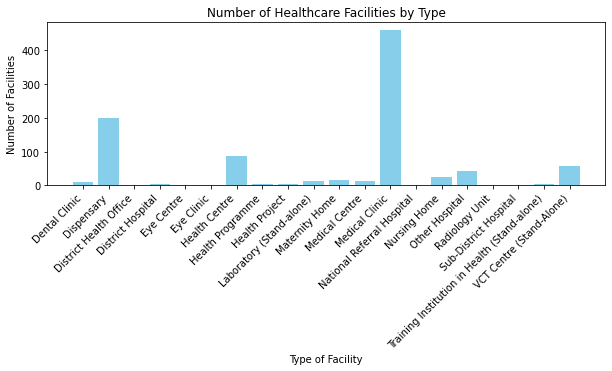

In [20]:
# Plot bar chart for facility count by type
plt.figure(figsize=(10, 3))
plt.bar(facility_count_by_type['Type'], facility_count_by_type['Count'], color='skyblue')
plt.xlabel('Type of Facility')
plt.ylabel('Number of Facilities')
plt.title('Number of Healthcare Facilities by Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

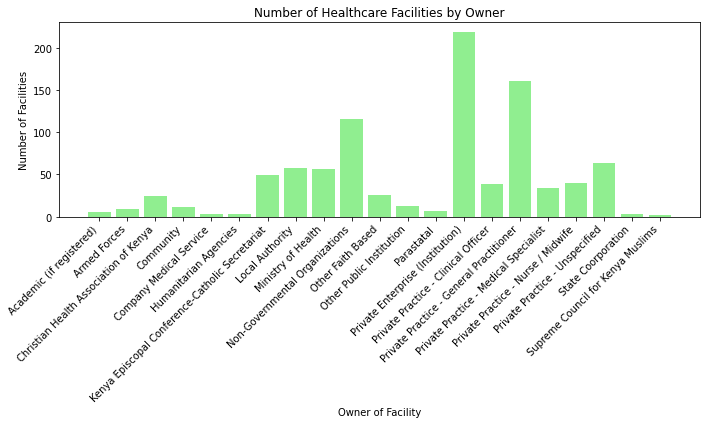

In [21]:
# Plot bar chart for facility count by owner
plt.figure(figsize=(10, 6))
plt.bar(facility_count_by_owner['Owner'], facility_count_by_owner['Count'], color='lightgreen')
plt.xlabel('Owner of Facility')
plt.ylabel('Number of Facilities')
plt.title('Number of Healthcare Facilities by Owner')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

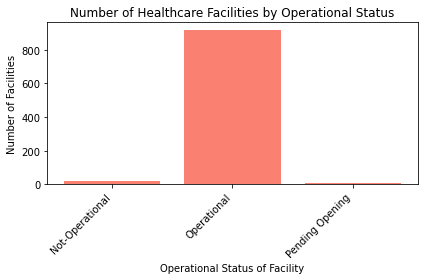

In [22]:
# Plot bar chart for facility count by operational status
plt.figure(figsize=(6, 4))
plt.bar(facility_count_by_status['Operational Status'], facility_count_by_status['Count'], color='salmon')
plt.xlabel('Operational Status of Facility')
plt.ylabel('Number of Facilities')
plt.title('Number of Healthcare Facilities by Operational Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* The type of healthcare facilities with the high number is the medical clinics(460), followed by dispensaries(199) 
* Most of the healthcare facilities in Nairobi are owned by private enterprises(219), followed by Private Practice - General Practitioners(161), and the Supreme Council for Kenya Muslims(2)
* 917 facilities are operational, 19 are not and 6 are pending opening.

Distribution of different services provided by healthcare facilities:
           Count
IPD          297
FP           280
HBC          250
ART          109
C-IMCI        72
OPD            0
TB TREAT       0
TB LABS        0
TB DIAG        0
RHTC/RHDC      0
RAD/XRAY       0
PMTCT          0
OUTREACH       0
ANC            0
GROWM          0
EPI            0
CEOC           0
CAES SEC       0
BLOOD          0
BEOC           0
HCT            0
YOUTH          0


<Figure size 864x1008 with 0 Axes>

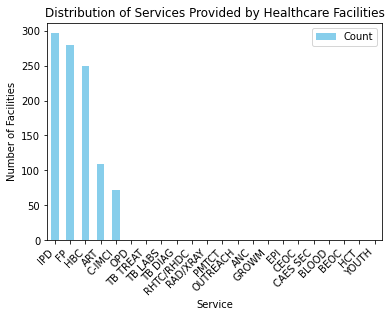

In [23]:
###Lets explore the services offered by these healthcare facilities

# Define a list of services to analyze
services = ['ANC', 'ART', 'HCT', 'FP', 'BEOC', 'BLOOD', 'CAES SEC', 'CEOC', 'C-IMCI', 'EPI', 'GROWM', 'HBC', 
            'IPD', 'OPD', 'OUTREACH', 'PMTCT', 'RAD/XRAY', 'RHTC/RHDC', 'TB DIAG', 'TB LABS', 'TB TREAT', 'YOUTH']

# Initialize an empty dictionary to store the count of facilities offering each service
service_counts = {}

# Iterate over each service
for service in services:
    # Count the number of facilities offering the current service
    count = Nairobi_df[service].dropna().shape[0]  # Drop NA values and count non-null values
    # Store the count in the dictionary
    service_counts[service] = count

# Convert the counts dictionary to a DataFrame for better visualization
service_counts_df = pd.DataFrame.from_dict(service_counts, orient='index', columns=['Count'])

# Sort the DataFrame by count in descending order
service_counts_df = service_counts_df.sort_values(by='Count', ascending=False)

# Print the distribution of services provided
print("Distribution of different services provided by healthcare facilities:")
print(service_counts_df)

# Plot a bar chart to visualize the distribution of services provided
plt.figure(figsize=(12, 14))
service_counts_df.plot(kind='bar', color='skyblue')
plt.xlabel('Service')
plt.ylabel('Number of Facilities')
plt.title('Distribution of Services Provided by Healthcare Facilities')
plt.xticks(rotation=45, ha='right')
plt.show()


The service that is offered by most healthcare facilities is Inpatient Care followed by Family Planning.



### 2.3.2 Bivariate Analysis
Bivariate analysis is the analysis of exactly two variables. We will use bivariate analysis to find
relationships between two variables.

In [45]:
### Let's compare the facilities than open 2 hours and that open on the weekends

# Filter the DataFrame for facilities that are open 24 hours
open_24_hours_facilities = Nairobi_df[Nairobi_df['Open 24 Hours'] == 'Y'].shape[0]
# Print the details of facilities that are open 24 hours
print("Healthcare facilities that are open 24 hours:", open_24_hours_facilities)


# Filter the DataFrame for facilities that are open 24 hours
open_weekends_facilities = Nairobi_df[Nairobi_df['Open Weekends'] == 'Y'].shape[0]
# Print the details of facilities that are open 24 hours
print("Healthcare facilities that are open on weekends:", open_weekends_facilities)

# Calculate the total number of facilities
total_facilities = Nairobi_df.shape[0]

# Calculate the percentage of facilities that are open 24 hours
percentage_open_24_hours = (open_24_hours_facilities / total_facilities) * 100

# Calculate the percentage of facilities that are open weekends
percentage_open_weekends = (open_weekends_facilities / total_facilities) * 100

# Print the results
print("Percentage of facilities open 24 hours: {:.2f}%".format(percentage_open_24_hours))
print("Percentage of facilities open weekends: {:.2f}%".format(percentage_open_weekends))


Healthcare facilities that are open 24 hours: 199
Healthcare facilities that are open on weekends: 516
Percentage of facilities open 24 hours: 21.13%
Percentage of facilities open weekends: 54.78%


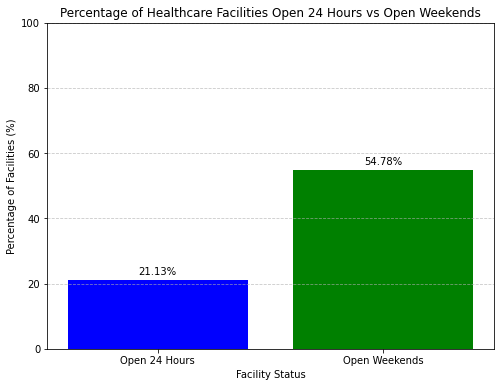

In [25]:
## Let's visualise this information 
# Define categories and corresponding percentages
categories = ['Open 24 Hours', 'Open Weekends']
percentages = [percentage_open_24_hours, percentage_open_weekends]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, percentages, color=['blue', 'green'])
plt.xlabel('Facility Status')
plt.ylabel('Percentage of Facilities (%)')
plt.title('Percentage of Healthcare Facilities Open 24 Hours vs Open Weekends')
plt.ylim(0, 100)  # Set y-axis limits to ensure visibility of percentages
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with percentages
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()


Many healthcare facilities open weekends(54.78%) more than they do 24 hours(21.13%)

Total number of beds in healthcare facilities: 7336.0
Total number of cots in healthcare facilities: 1086.0


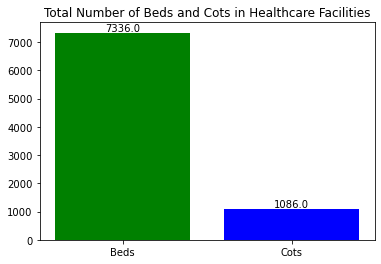

In [26]:
## Let's see the number of beds and cots in the healthcare facilities

# Count the total number of beds
total_beds = Nairobi_df['Beds'].sum()

# Count the total number of cots
total_cots = Nairobi_df['Cots'].sum()

# Print the total number of beds and cots
print("Total number of beds in healthcare facilities:", total_beds)
print("Total number of cots in healthcare facilities:", total_cots)

# Plot bar chart for facility count by beds and cots
categories = ['Beds', 'Cots']
totals = [total_beds, total_cots]

plt.figure(figsize=(6, 4))
plt.bar(categories, totals, color=['green','blue'])
plt.title('Total Number of Beds and Cots in Healthcare Facilities')

# Annotate bars with values
for i, total in enumerate(totals):
    plt.text(i, total, str(total), ha='center', va='bottom')
plt.show()


Many facilities have more beds than they do cots. Let's investigate which type of healthcare facilities have beds and cots. 

In [27]:
## Now lets see the size of various healthcare facilities by the number of beds and cots 
 
# Group the data by 'Type' and calculate the sum of beds and cots for each type
beds_cots_distribution = Nairobi_df.groupby('Type')[['Beds', 'Cots']].sum()
beds_cots_distribution

,Beds,Cots
Type,,
Dental Clinic,0.0,0.0
Dispensary,116.0,18.0
District Health Office,0.0,0.0
District Hospital,1012.0,22.0
Eye Centre,0.0,0.0
Eye Clinic,0.0,0.0
Health Centre,721.0,56.0
Health Programme,0.0,0.0
Health Project,0.0,0.0


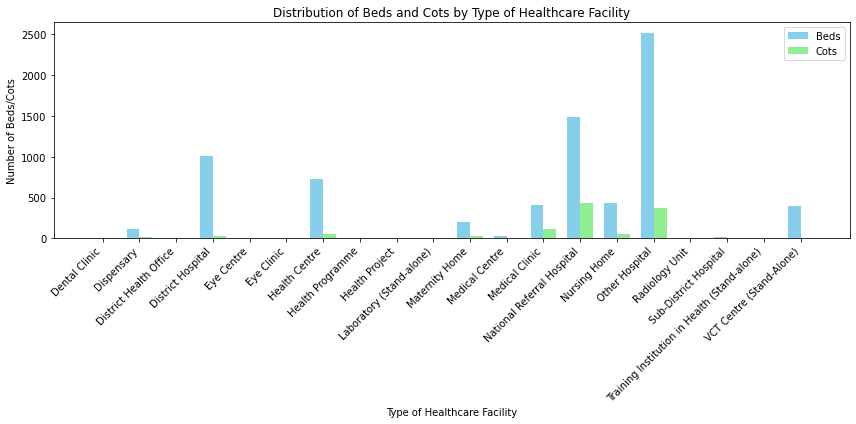

In [28]:
## Visualising the above information
# Plot the distribution of beds and cots
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(beds_cots_distribution.index))

plt.bar(index, beds_cots_distribution['Beds'], bar_width, label='Beds', color='skyblue')
plt.bar([i + bar_width for i in index], beds_cots_distribution['Cots'], bar_width, label='Cots', color='lightgreen')

plt.xlabel('Type of Healthcare Facility')
plt.ylabel('Number of Beds/Cots')
plt.title('Distribution of Beds and Cots by Type of Healthcare Facility')
plt.xticks([i + bar_width / 2 for i in index], beds_cots_distribution.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


* 'Other Hospital' have the most beds(2521) and National Referral Hospital have the most cots(427)
* Some facilities have no beds nor cots like dental and eye clinics

Note* Beds are typically more permanent fixtures for patients that require extended stays in inpatient care whereas cots are smaller and more portable than beds commonly for temporary accomodations.

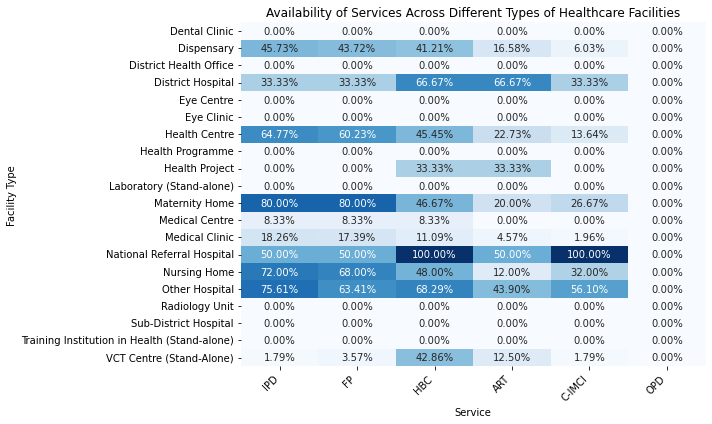

In [60]:
### Lets investigate the different types of facilities and the services they offer

# Group the data by facility type and calculate service availability
service_availability_by_type = Nairobi_df.groupby('Type')[['IPD', 'FP', 'HBC', 'ART', 'C-IMCI', 'OPD'  ]].apply(lambda x: (x == 'Y').mean()).reset_index()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(service_availability_by_type.set_index('Type'), cmap='Blues', annot=True, fmt=".2%", cbar=False)
plt.xlabel('Service')
plt.ylabel('Facility Type')
plt.title('Availability of Services Across Different Types of Healthcare Facilities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



<Figure size 720x432 with 0 Axes>

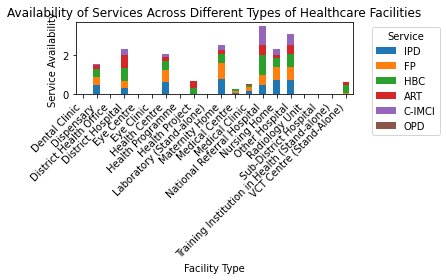

In [59]:

# Stacked Bar Chart 
plt.figure(figsize=(10, 6))
ax = service_availability_by_type.set_index('Type').plot(kind='bar', stacked=True)
plt.xlabel('Facility Type')
plt.ylabel('Service Availability')
plt.title('Availability of Services Across Different Types of Healthcare Facilities')
plt.legend(title='Service', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


From the above visualisations, we can see that most services are offered by the dispensaries.

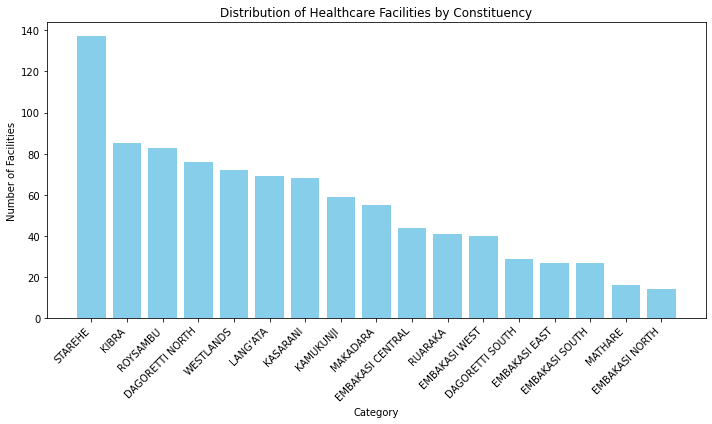

In [31]:
## Let's investigate the distribution of healthcare facilities according to location 

# Define a function to plot bar chart, pie chart, or histogram
def plot_distribution(data, title, chart_type='bar'):
    plt.figure(figsize=(10, 6))
    
    if chart_type == 'bar':
        plt.bar(data.index, data.values, color='skyblue')
    
    plt.xlabel('Category')
    plt.ylabel('Number of Facilities')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot distribution of healthcare facilities by constituency
constituency_distribution = Nairobi_df['Constituency'].value_counts()
plot_distribution(constituency_distribution, 'Distribution of Healthcare Facilities by Constituency')


Starehe has the most healthcare facilities

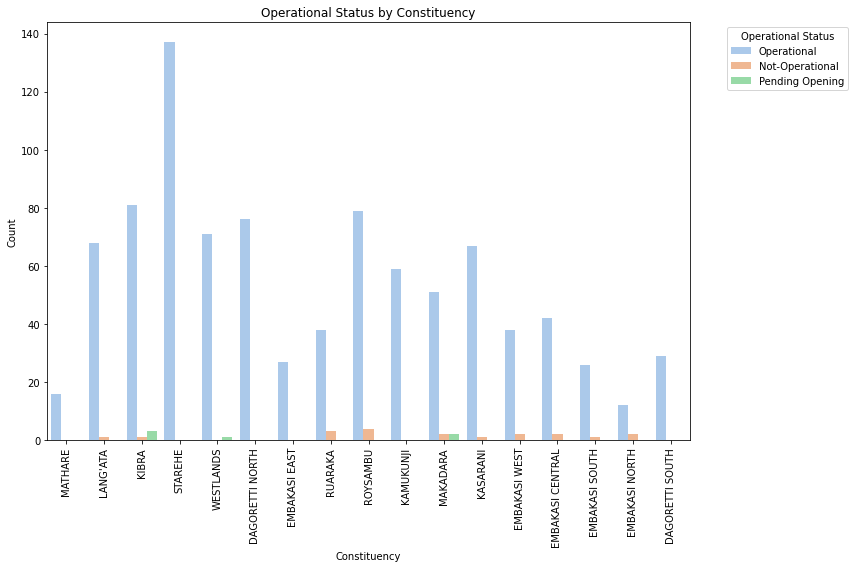

In [32]:
### Let's the check the relation of the operational status of a facility and it's location

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Constituency': Nairobi_df['Constituency'].tolist(),
    'Operational Status': Nairobi_df['Operational Status'].tolist()
}

df2 = pd.DataFrame(data)

## Plot grouped bar chart
plt.figure(figsize=(12, 8))
sns.countplot(data=df2, x='Constituency', hue='Operational Status', palette='pastel')
plt.xlabel('Constituency')
plt.ylabel('Count')
plt.title('Operational Status by Constituency')
plt.legend(title='Operational Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Starehe has the most operational facilities, Royssambu has the most non-operational facilities and Kibra has the most facilities pending opening. 


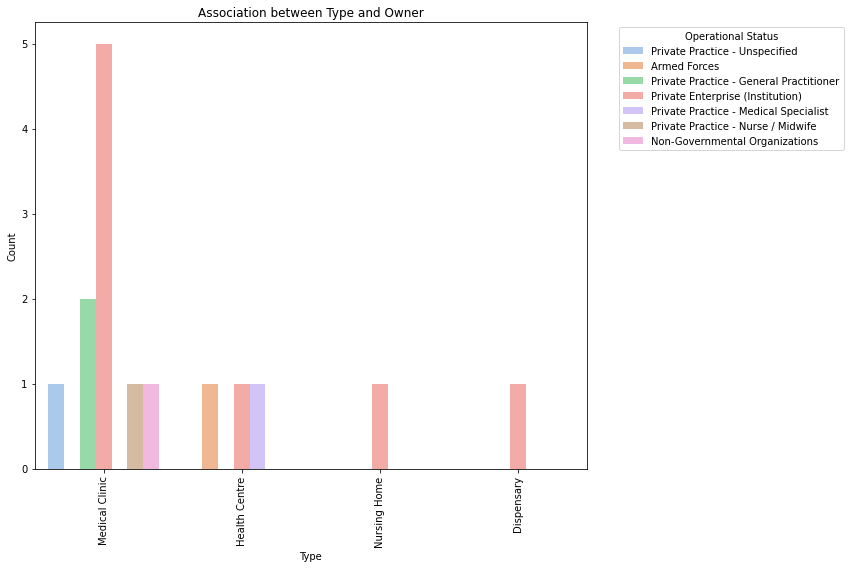

In [33]:
### The correlation between the type of facility and the owner 

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Type': Nairobi_df['Type'][:15].tolist(),
    'Owner': Nairobi_df['Owner'][:15].tolist()
}
df3 = pd.DataFrame(data)
# Count the occurrences of each owner
top_owners= df3['Owner'].value_counts().nlargest(15).index

# Filter the DataFrame to include only the top 10 owners
newdf3 = df3[df3['Owner'].isin(top_owners)]

## Plot grouped bar chart
plt.figure(figsize=(12, 8))
sns.countplot(data=newdf3, x='Type', hue='Owner', palette='pastel')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Association between Type and Owner')
plt.legend(title='Operational Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Most of the healthcare facilities in Nairobi are owned private enterprises. 

Some medical clinics are owned general practitioners 

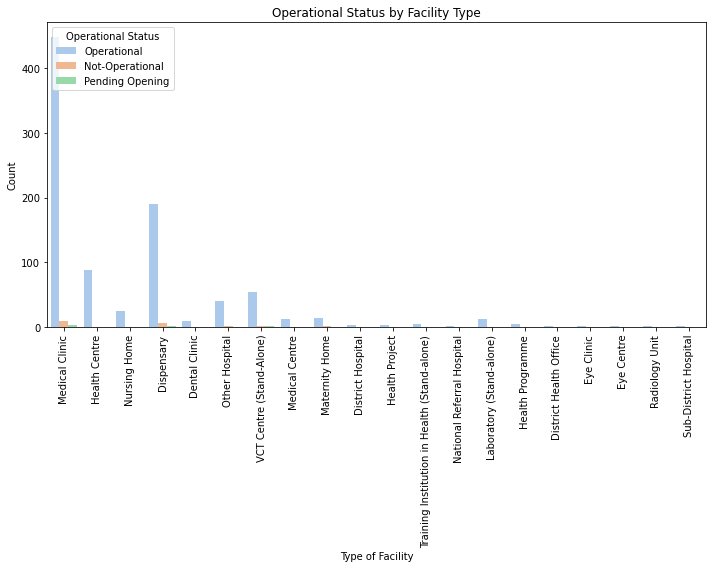

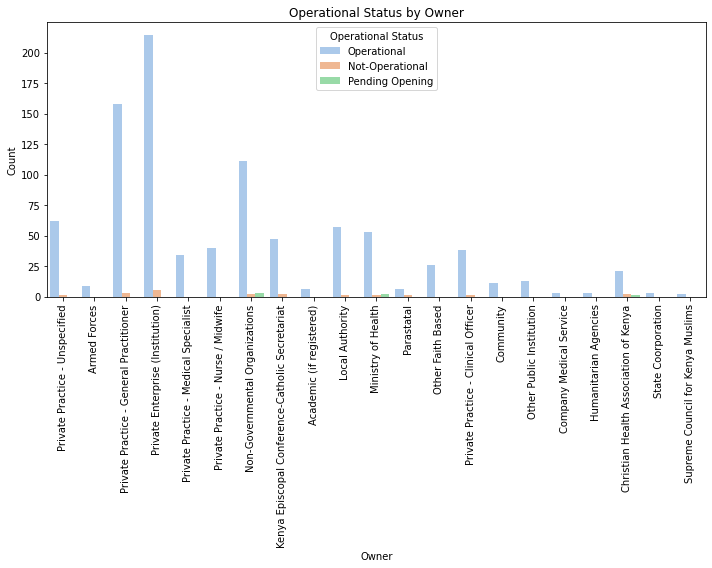

In [34]:
### We can also see if different facilites are operational by type and owner

# Plot between Type and Operational Status
plt.figure(figsize=(10, 8))
sns.countplot(data=Nairobi_df, x='Type', hue='Operational Status', palette='pastel')
plt.xlabel('Type of Facility')
plt.ylabel('Count')
plt.title('Operational Status by Facility Type')
plt.xticks(rotation=90)
plt.legend(title='Operational Status')
plt.tight_layout()
plt.show()

# Plot between Owner and Operational Status
plt.figure(figsize=(10, 8))
sns.countplot(data=Nairobi_df, x='Owner', hue='Operational Status', palette='pastel')
plt.xlabel('Owner')
plt.ylabel('Count')
plt.title('Operational Status by Owner')
plt.xticks(rotation=90)
plt.legend(title='Operational Status')
plt.tight_layout()
plt.show()


* Medical Centres and Dispensaries have both the most operational and non-operatinal facilities.
* Private institutions have the most operational and non-operatinal facilities.
* Non-governmental organizations and the Ministry of Health have the highest number of facilities that are pending opening  

#### 2.3.3 Multivariate Analysis
This is the analysis of more than 2 variables at the same ime and finding out if they are
correlated


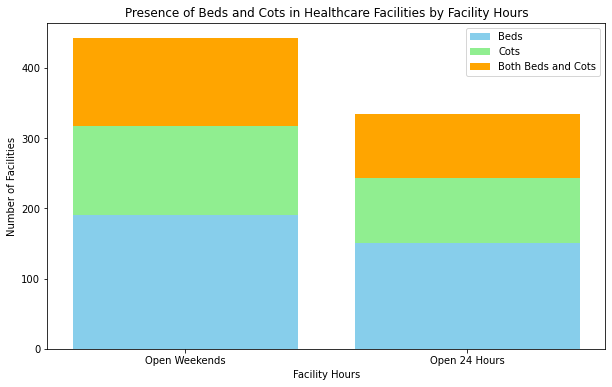

In [35]:
## Correlation of availability of beds and cots with whether a facility opens over the weekend and 24 hours

# Filter data for facilities open on weekends
open_weekends = Nairobi_df[Nairobi_df['Open Weekends'] == 'Y']

# Count facilities with beds and cots open on weekends
open_weekends_with_beds = open_weekends[open_weekends['Beds'] > 0].shape[0]
open_weekends_with_cots = open_weekends[open_weekends['Cots'] > 0].shape[0]
open_weekends_with_both = open_weekends[(open_weekends['Beds'] > 0) & (open_weekends['Cots'] > 0)].shape[0]

# Filter data for facilities open 24 hours
open_24_hours = Nairobi_df[Nairobi_df['Open 24 Hours'] == 'Y']

# Count facilities with beds and cots open 24 hours
open_24_hours_with_beds = open_24_hours[open_24_hours['Beds'] > 0].shape[0]
open_24_hours_with_cots = open_24_hours[open_24_hours['Cots'] > 0].shape[0]
open_24_hours_with_both = open_24_hours[(open_24_hours['Beds'] > 0) & (open_24_hours['Cots'] > 0)].shape[0]

# Data for the stacked bar chart
categories = ['Open Weekends', 'Open 24 Hours']
beds = [open_weekends_with_beds, open_24_hours_with_beds]
cots = [open_weekends_with_cots, open_24_hours_with_cots]
both = [open_weekends_with_both, open_24_hours_with_both]

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, beds, color='skyblue', label='Beds')
plt.bar(categories, cots, bottom=beds, color='lightgreen', label='Cots')
plt.bar(categories, both, bottom=[i+j for i,j in zip(beds, cots)], color='orange', label='Both Beds and Cots')

plt.xlabel('Facility Hours')
plt.ylabel('Number of Facilities')
plt.title('Presence of Beds and Cots in Healthcare Facilities by Facility Hours')
plt.legend()
plt.show()



Many healthcare facilities that open over the weekend have more beds and cots than those that open for 24 hours


In [36]:
### Calculate the average number of beds and cots per constituency
average_beds_cots = Nairobi_df.groupby('Constituency')[['Beds', 'Cots']].sum().reset_index()
average_beds_cots

,Constituency,Beds,Cots
0,DAGORETTI NORTH,569.0,110.0
1,DAGORETTI SOUTH,57.0,2.0
2,EMBAKASI CENTRAL,345.0,68.0
3,EMBAKASI EAST,113.0,29.0
4,EMBAKASI NORTH,12.0,1.0
5,EMBAKASI SOUTH,117.0,28.0
6,EMBAKASI WEST,192.0,36.0
7,KAMUKUNJI,1083.0,206.0
8,KASARANI,217.0,25.0
9,KIBRA,1784.0,441.0


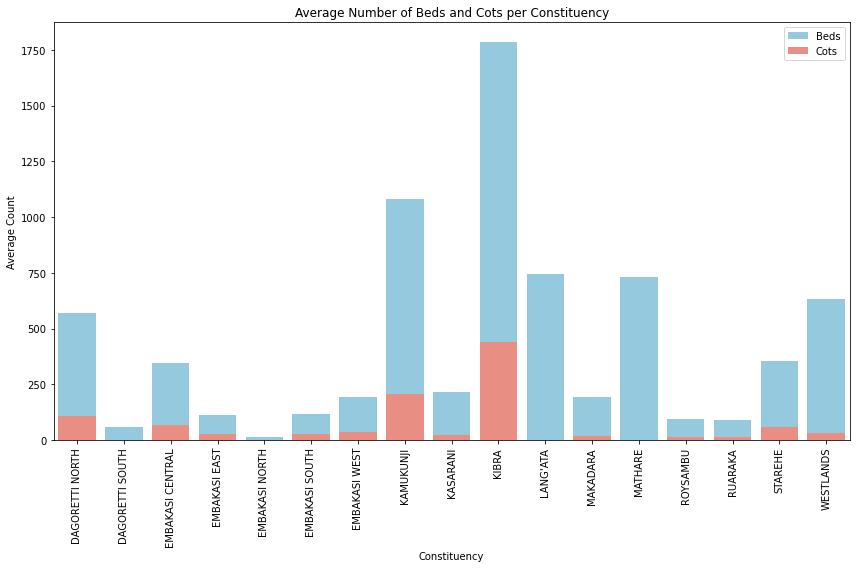

In [37]:
# Plot the average number of beds and cots per constituency
plt.figure(figsize=(12, 8))
sns.barplot(data=average_beds_cots, x='Constituency', y='Beds', color='skyblue', label='Beds')
sns.barplot(data=average_beds_cots, x='Constituency', y='Cots', color='salmon', label='Cots')
plt.xlabel('Constituency')
plt.ylabel('Average Count')
plt.title('Average Number of Beds and Cots per Constituency')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


Kamukunji constituency has the most beds(1083) and cots(206.0) whereas Embakasi North has the least beds(12) and cots

Langata and Mathare have no cots at all


<Figure size 864x576 with 0 Axes>

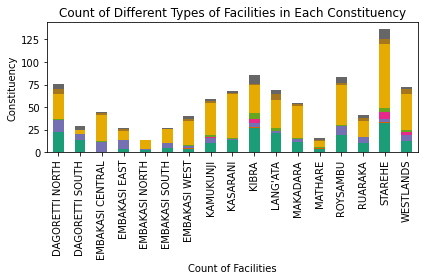

In [38]:
# Group the data by 'Constituency' and 'Type' and count the number of facilities in each category
facility_count = Nairobi_df.groupby(['Constituency', 'Type']).size().unstack(fill_value=0)

# Plot the stacked bar chart
plt.figure(figsize=(12,8 ))
barwidth=1.5
ax = facility_count.plot(kind='bar', stacked=True, colormap='Dark2')
plt.xlabel('Count of Facilities')
plt.ylabel('Constituency')
plt.title('Count of Different Types of Facilities in Each Constituency')
plt.xticks(rotation=90)
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.legend().remove()
plt.tight_layout()
plt.show()

In [39]:
facility_count = Nairobi_df.groupby(['Constituency', 'Type']).size().unstack(fill_value=0)
facility_count

Type,Dental Clinic,Dispensary,District Health Office,District Hospital,Eye Centre,Eye Clinic,Health Centre,Health Programme,Health Project,Laboratory (Stand-alone),Maternity Home,Medical Centre,Medical Clinic,National Referral Hospital,Nursing Home,Other Hospital,Radiology Unit,Sub-District Hospital,Training Institution in Health (Stand-alone),VCT Centre (Stand-Alone)
Constituency,,,,,,,,,,,,,,,,,,,,
DAGORETTI NORTH,1,21,0,0,0,0,13,1,0,0,0,1,27,1,0,5,0,0,1,5
DAGORETTI SOUTH,0,14,0,0,0,0,6,0,0,0,0,0,5,0,0,0,0,0,0,4
EMBAKASI CENTRAL,0,0,0,0,0,0,11,0,0,0,1,0,27,0,2,2,0,0,0,1
EMBAKASI EAST,0,4,0,0,0,0,9,0,0,0,0,0,11,0,0,2,0,0,0,1
EMBAKASI NORTH,0,2,0,0,0,0,2,0,0,0,0,0,10,0,0,0,0,0,0,0
EMBAKASI SOUTH,0,4,1,0,0,0,5,0,0,0,0,0,14,0,2,0,0,0,0,1
EMBAKASI WEST,0,4,0,1,0,0,2,0,0,0,1,0,26,0,1,2,0,0,0,3
KAMUKUNJI,0,10,0,0,0,0,6,0,1,0,1,1,25,0,11,2,0,0,0,2
KASARANI,0,13,0,0,0,0,2,0,0,0,1,0,46,0,2,2,0,0,0,2


* Every constituency has a medical clinic, Starehe has the most and Mathare has the least.
* Followed by a dispensary, Kibra has the most whereas Embakasi Central has none. 
* Only Starehe(9) and Dagoretti North(1) have a dental clinic.
* The only constituencies that have a laboratories are Kibra(5), Starehe(7) and Westlands(1)
* The only radiology unit is in Starehe
* There are only 2 National Referral Hospitals in Kibra and Dagoretti North 
* Many of the healthcare facilites are found in Starehe Constituency
* Embakasi North has the least number of healthcare facilities

*** Let's do an an analysis of the population data 

In [40]:
Nairobi_pop_df

,county,sub-county,Age,Male,Female,Total
31604,NAIROBI,ALL,Total,2192452,2204376,4396828
31605,NAIROBI,ALL,0,57265,56523,113788
31606,NAIROBI,ALL,1,56019,54601,110620
31607,NAIROBI,ALL,2,52518,51848,104366
31608,NAIROBI,ALL,3,51115,51027,102142
...,...,...,...,...,...,...
33075,NAIROBI,WESTLANDS,98,3,8,11
33076,NAIROBI,WESTLANDS,99,9,14,23
33077,NAIROBI,WESTLANDS,95-99,29,63,92
33078,NAIROBI,WESTLANDS,100+,7,16,23


In [41]:
## We want to use the age groups that have already been provided in the dataset 

# Regular expression to match age ranges
age_range_pattern = r'^\d+\s*-\s*\d+$'

# Filter rows where 'Age' column matches the age range pattern
age_range_rows = Nairobi_pop_df['Age'].str.match(age_range_pattern)

# Filter the DataFrame to include only rows where 'Age' column represents a range
age_range_df = Nairobi_pop_df[age_range_rows]

print(age_range_df)


        county sub-county     Age    Male  Female   Total
31610  NAIROBI        ALL   0 - 4  264099  260888  524987
31616  NAIROBI        ALL     5-9  215230  217482  432712
31622  NAIROBI        ALL  10 -14  185008  193542  378550
31628  NAIROBI        ALL   15-19  159098  192755  351853
31634  NAIROBI        ALL   20-24  249534  313485  563019
...        ...        ...     ...     ...     ...     ...
33053  NAIROBI  WESTLANDS   75-79     914     990    1904
33059  NAIROBI  WESTLANDS   80-84     571     672    1243
33065  NAIROBI  WESTLANDS   85-89     285     369     654
33071  NAIROBI  WESTLANDS   90-94      84     124     208
33077  NAIROBI  WESTLANDS   95-99      29      63      92

[240 rows x 6 columns]


C:\Users\HP\AppData\Local\Temp\ipykernel_16868\2847652385.py:8: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.yticks([])


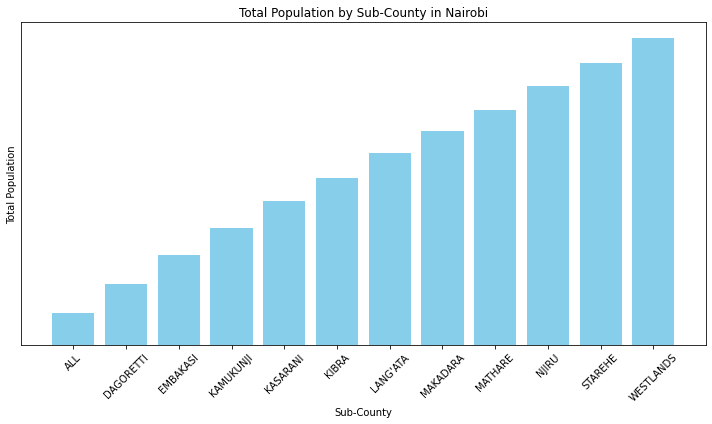

In [44]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(Nairobi_pop_df['sub-county'], Nairobi_pop_df['Total'], color='skyblue')
plt.title('Total Population by Sub-County in Nairobi')
plt.xlabel('Sub-County')
plt.ylabel('Total Population')
plt.xticks(rotation=45)
plt.yticks([])
plt.tight_layout()
plt.show()

Most of Nairobi's population lives in Westlands constituency and the constituency with the least is Dagoretti

## 3. Data Report

The following is a summary of the data exploration and analysis;

1.  The type of healthcare facilities with the high number is the medical clinics(460), followed by dispensaries(199) 
2. Most of the healthcare facilities in Nairobi are owned by private enterprises(219), followed by Private Practice - General Practitioners(161), and the Supreme Council for Kenya Muslims(2)
3. 917 facilities are operational, 19 are not and 6 are pending opening.
4. The service that is offered by most healthcare facilities is Inpatient Care(IPD-297) followed by Family Planning(280). Other services offered are Home-Based Care(250), Anti-retro Treatment(109) and C-IMCI: Community-based Integrated Management of Childhood Illnesses(72)
5. Healthcare facilities that are open 24 hours: 199
Healthcare facilities that are open on weekends: 516
Percentage of facilities open 24 hours: 21.13%
Percentage of facilities open weekends: 54.78%
6. Total number of beds in healthcare facilities: 7336.0
Total number of cots in healthcare facilities: 1086.0
7. 'Other Hospital' have the most beds(2521) and National Referral Hospital have the most cots(427)
* Some facilities have no beds nor cots like dental and eye clinics
8. Most services are offered by the dispensaries and medical clinincs 
9. Starehe has the most healthcare facilities
10. Starehe has the most operational facilities, Royssambu has the most non-operational facilities and Kibra has the most facilities pending opening. 
11. Most of the healthcare facilities in Nairobi are owned private enterprises. 
* Some medical clinics are owned general practitioners 
12. Medical Centres and Dispensaries have both the most operational and non-operatinal facilities.
 * Private institutions have the most operational and non-operatinal facilities.
* Non-governmental organizations and the Ministry of Health have the highest number of facilities that are pending opening  
13. Many healthcare facilities that open over the weekend have more beds and cots than those that open for 24 hours
14. Kamukunji constituency has the most beds(1083) and cots(206.0) whereas Embakasi North has the least beds(12) and cots
Langata and Mathare have no cots at all
15. Every constituency has a medical clinic, Starehe has the most and Mathare has the least.
* Followed by a dispensary, Kibra has the most whereas Embakasi Central has none. 
* Only Starehe(9) and Dagoretti North(1) have a dental clinic.
* The only constituencies that have a laboratories are Kibra(5), Starehe(7) and Westlands(1)
* The only radiology unit is in Starehe
* There are only 2 National Referral Hospitals in Kibra and Dagoretti North 
* Many of the healthcare facilites are found in Starehe Constituency
* Embakasi North has the least number of healthcare facilities
16.Most of Nairobi's population lives in Westlands constituency and the constituency with the least is Dagoretti 

